#Workflow

House Price Data -> Data Preprocessing -> Data Analysis ->
Train Test Split -> XGBoostRegressor -> Evaluation

Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset in a Pandas Dataframe

In [5]:
house_data = pd.read_csv('/content/HousingData.csv')

In [8]:
# Printing the first 5 rows

house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Initial Inspection of the Dataset

In [9]:
# Shape of the Dataset

house_data.shape

(506, 14)

In [10]:
# Check for missing values in the dataset

house_data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Handling Missing Values in the Dataset

In [13]:
num_cols = house_data.select_dtypes(include = ['number']).columns
print(num_cols)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [17]:
#Imputing Missing values with Median and Mean

for col in num_cols:
  if house_data[col].isnull().sum()>0:
    skewness = house_data[col].skew()
    if abs(skewness) > 0.5:
      house_data[col].fillna(house_data[col].median(),inplace = True)
    else:
      house_data[col].fillna(house_data[col].mean(), inplace = True)

In [18]:
house_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [19]:
# Statistical Measures of the Dataset

house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.083992,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.699165,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.900000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [20]:
# Finding the Correlation Matrix

correlation = house_data.corr()

Correlation Heatmap

<Axes: >

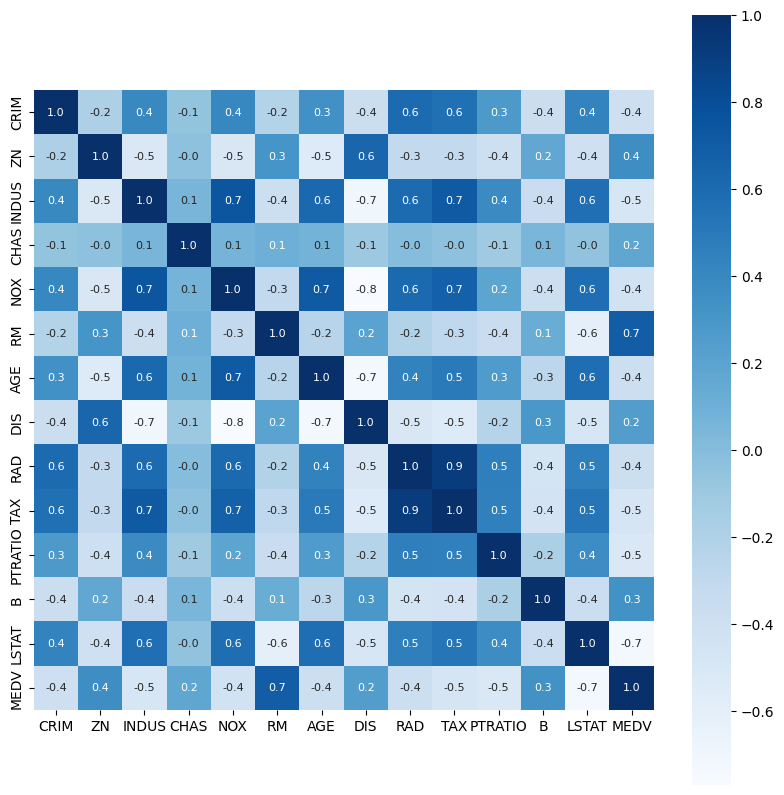

In [22]:
# Constructing the Correlation Heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap = "Blues", square = True ,annot = True, fmt= ".1f",annot_kws = {'size' : 8}, cbar =True)

Separating the Features and Label (Target variable)

In [23]:
X = house_data.drop(columns=['MEDV'], axis=1)
Y = house_data['MEDV']

In [24]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...    3  222     18.7  396.90  11.43
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...    1  273     21.0  391.99  11.43
502  0.04527   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]


In [25]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


Splitting the data into Training and Testing Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
print(X_train.shape,X_test.shape,X.shape)

(404, 13) (102, 13) (506, 13)


#Model Training

XGBoostRegressor Algorithm:
An ensemble, Decision Tree based model

In [28]:
# Loading the Model

model = XGBRegressor()

In [29]:
# Training the Model with X_train and Y_train

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

Prediction on Training data

In [30]:
# Accuracy for Prediction on Training data

training_data_prediction = model.predict(X_train)

In [31]:
print(training_data_prediction)

[23.088282  21.004404  20.101917  34.69858   13.904518  13.498435
 22.000814  15.19122   10.895145  22.686384  13.797335   5.599122
 29.805696  49.996304  34.89934   20.605354  23.395819  19.192165
 32.69193   19.611345  26.994907   8.403495  45.9959    21.717173
 27.080256  19.37746   19.291792  24.804375  22.608118  31.717747
 18.503166   8.701276  17.40002   23.702148  13.299977  10.505168
 12.708206  25.002316  19.699436  14.904632  24.189217  24.99873
 14.904605  17.00089   15.596224  12.694254  24.501297  15.01133
 49.99898   17.514353  21.19976   32.027584  15.600577  22.901209
 19.316309  18.729294  23.297228  37.20302   30.100313  33.100212
 20.996395  49.994473  13.400452   5.001948  16.495111   8.400155
 28.67411   19.5004    20.597046  45.402718  39.80375   33.407898
 19.809647  33.40398   25.293839  50.00442   12.51351   17.41693
 18.603037  22.596945  50.000282  23.796461  23.307312  23.092857
 41.69838   16.111403  31.597115  36.09642    6.99893   20.389744
 19.992292  1

In [33]:
# R-squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R-squared error on Training data : ", score_1)
print('Mean Absolute Error on Training data: ', score_2)

R-squared error on Training data :  0.999998800949575
Mean Absolute Error on Training data:  0.006799904662783754


Visualize the actual Prices and Predicted Prices (for Training Data)

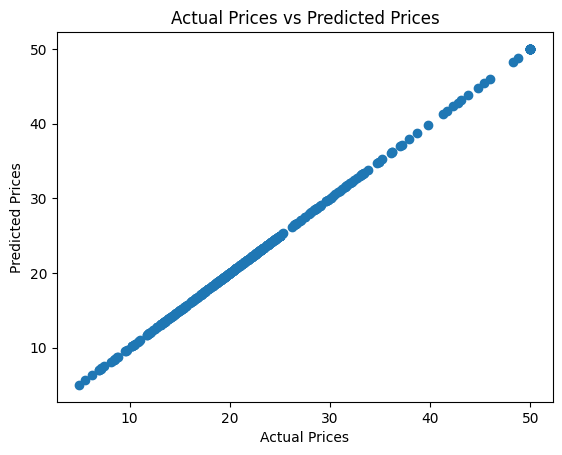

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction on Test Data

In [35]:
# Accuracy for Prediction on Testing data

testing_data_prediction = model.predict(X_test)

In [36]:
# R squared error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("R-squared error on Testing data: ", score_1)
print("Mean Absolute Error on Testing data: ",score_2)

R-squared error on Testing data:  0.8937787465073165
Mean Absolute Error on Testing data:  2.236589342005112


Visualize the actual Prices and Predicted Prices (for Testing Data)

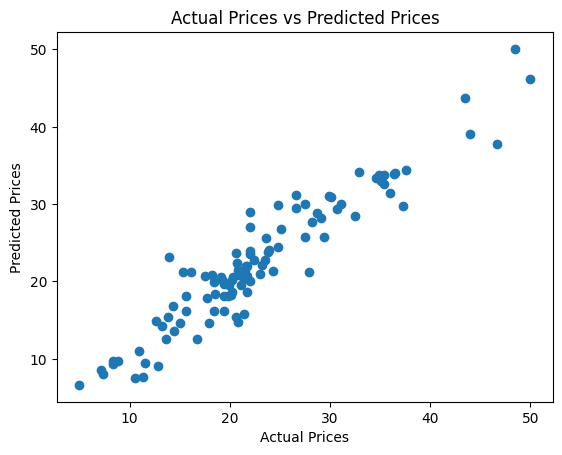

In [40]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()